In [43]:
import numpy as np 
import pandas as pd
import glob 
import os
import matplotlib.pyplot as plt

path = 'boston-housing-dataset'
X_test = pd.read_csv(os.path.join(path,'housing_X_test.csv'))
X_train = pd.read_csv(os.path.join(path,'housing_X_train.csv'))
y_train = pd.read_csv(os.path.join(path,'housing_y_train.csv'))
y_test = pd.read_csv(os.path.join(path,'housing_y_test.csv'))

In [44]:
# MSE
def MSE(y,y_pred):
    return np.mean((y-y_pred)**2)

class RidgeRegression(object):
    def __init__(self, λ=0.1):
        self.λ = λ

    def fit(self, X, y):
        # closed form solution 
        self.w = np.linalg.inv(X.T.dot(X) + self.λ * np.eye(X.shape[1])).dot(X.T).dot(y)

    def predict(self, X):
        return X.dot(self.w)

In [45]:
X_train.insert(0,'1s',1)
X_test.insert(0,'1s',1)
X_train.describe()

,1s,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98
count,305.0,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,1.0,0.429540,15.855738,8.802098,0.088525,0.512803,6.427262,62.284918,4.299372,4.540984,311.822951,17.577377,378.896295,10.659770
std,0.0,0.666485,26.043906,6.355356,0.284523,0.108503,0.703068,29.192208,1.978917,1.623975,68.987567,2.274714,42.997783,6.169608
min,1.0,0.009060,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000
25%,1.0,0.066640,0.000000,4.050000,0.000000,0.437000,5.942000,36.600000,2.646300,4.000000,264.000000,15.900000,382.000000,6.050000
50%,1.0,0.136420,0.000000,6.410000,0.000000,0.489000,6.273000,66.200000,3.945400,5.000000,307.000000,17.800000,392.200000,9.500000
75%,1.0,0.520140,22.000000,10.590000,0.000000,0.547000,6.800000,91.200000,5.720900,5.000000,384.000000,19.100000,395.620000,14.090000
max,1.0,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000


In [46]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(305, 14) (305, 1)
(199, 14) (199, 1)


In [47]:
#test set
rr = RidgeRegression(λ=20)
#rr = Ridge(11)
rr.fit(X_train,y_train)
pred = rr.predict(X_test)
MSE(pred.values, y_test.values)

106.86043538371861

In [48]:
# cross-validated init 
λ_i = [i*0.01 for i in range(1,101)]
λ_accu = {}

# CV .....
CV = []
for i in range(0,10):
    CV.append([x for x in range(i*30,i*30+30)])
for i in range(300,305):
    CV[9].append(i)

In [49]:
# cross validate result
for λ in λ_i:
    accuracy = []
    for val_set in range(0,10):
        validation = X_train.index.isin(CV[val_set])
        X = X_train.iloc[~validation]
        y = y_train.iloc[~validation]
        X_t = X_train.iloc[validation]
        y_t = y_train.iloc[validation]

        rr = RidgeRegression(λ)
        rr.fit(X,y)
        y_pred = rr.predict(X_t)

        y_err = MSE(y_pred.values,y_t.values)
        accuracy.append(y_err)
    λ_accu.setdefault(λ,np.mean(accuracy))
    

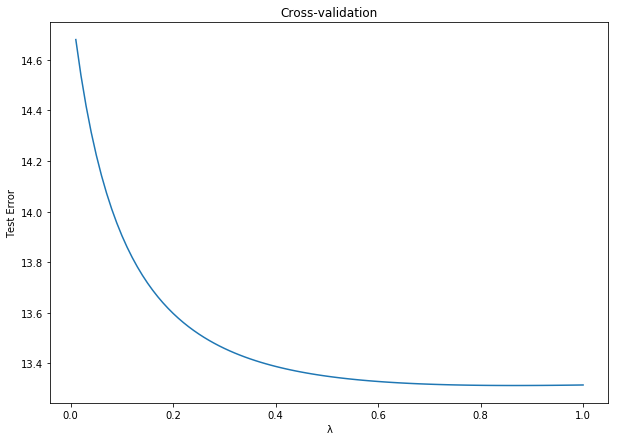

In [50]:
plt.figure(figsize=(10,7))
plt.plot(λ_accu.keys(), λ_accu.values())
plt.title('Cross-validation')
plt.xlabel('λ')
plt.ylabel('Test Error')
plt.show()

In [53]:
best = min(λ_accu, key=λ_accu.get)
print('Best Lambda: ',best)
rr = RidgeRegression(best)
rr.fit(X_train,y_train)
y_pred = rr.predict(X_test)
y_err = MSE(y_pred.T.values,y_test.T.values)
print('Test Error: ',y_err)

Best Lambda:  0.87
Test Error:  184.37398419435937
